¡Hola, Marcelo!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Marcelo! Has hecho un excelente trabajo con los ajustes, cada vez más cercas de convertirte en una analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

<div class="alert alert-block alert-info"> Hola Tonatiuh! mucho gusto, muchisimas gracias por sus observaciones, realice todas las correcciones indicadas y los resultados definitivamente mejoraron mucho, nuevamente muchas gracias por habermelos señalado por han enriquesido mi conociminto especialmente en el manejo y comprencion de hipotesis.

###Tienes que identificar patrones que determinen si un juego tiene éxito o no.

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas.

###Paso 1. Abre el archivo de datos y estudia la información general

###1.1.-Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy import stats as st
from scipy.stats import levene

###1.2.-Cargar datos

In [2]:
juegos = pd.read_csv('/datasets/games.csv')


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [3]:
juegos

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
juegos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
juegos.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


###Paso 2. Prepara los datos

2.1 Convertir todos los nombres de las columnas a minusculas

In [6]:
juegos.columns=juegos.columns.str.lower()
juegos.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

2.2 Convierte los datos en los tipos necesarios.

In [7]:
#Convertimos las columnas de año y critica del usuario de object a datos numericos
#ya que podriamos necesitar realizar calculos matematicos y esto nos ayudaria a futuro
juegos['year_of_release'] = pd.to_numeric(juegos['year_of_release'], errors='coerce')
juegos['user_score'] = pd.to_numeric(juegos['user_score'], errors='coerce')
#verificamos que los cambios se hayan realizado con exito
juegos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


<div class="alert alert-block alert-info">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
En ocasiones podemos completar los valores faltantes con información con proxys. Por ejemplo en este caso los podríamos completar con los años de lanzamientos de los juegos en otras plataformas
</div>

2.3.- Si es necesario, elige la manera de tratar los valores ausentes:

In [8]:
#primero calculamos la cantidad de valores ausentes por columnas
valores_faltantes=juegos.isnull().sum()
valores_faltantes

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [9]:
#segundo calculamos el porcentaje de valores ausentes por columna
porcentaje_faltantes= valores_faltantes/len(juegos)*100
porcentaje_faltantes

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

2.4.-Tratar los valores ausentes

In [10]:
# #Al conocer que la calificacion de la critica es alfabetica decidimos rellenar los
# #valores ausentes de esta columna con el titulo "sin calificacion"
juegos['rating']= juegos['rating'].fillna('sin calificacion')
#eliminamos los valores ausentes de las columnas con contidades que concideramos no criticas
#para nuestro analisis
juegos= juegos.dropna(subset=['name','year_of_release','genre'])
#revisamos nuevamente nuestros valores faltantes
#complatamos nuestros valores faltantes de critic_score la mediana
juegos['critic_score']= juegos['critic_score'].fillna(juegos['critic_score'].median())
#complatamos nuestros valores faltantes de user_score la mediana
juegos['user_score']= juegos['user_score'].fillna(juegos['user_score'].median())
juegos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


/tmp/ipykernel_32/23069258.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juegos['critic_score']= juegos['critic_score'].fillna(juegos['critic_score'].median())
/tmp/ipykernel_32/23069258.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juegos['user_score']= juegos['user_score'].fillna(juegos['user_score'].median())


***En base a los resultados obtenidos podemos observar que el porcentaje de significancia de valores ausentes es muy elevado en tres columnas, critic_score,user_score y rating.***

***Por lo estudiado y conversado en clase decidimos que para critic_score y user_score es mejor mantener esos datos tal como estan en las columnas para evitar cambios en nuestros resultados futuros, mientras que rating al no ser un valor numero simplimente procedemos a rellenarlos con el titulo sin calificacion.***

***En cambio en las columnas name, year of release y genre sus porcentajes son casi insignificantes por lo que procedemos a eliminarlos, tomando en cuenta que su porcentaje no altera nuestros resultados y tambien que si bien la columna de año supera el 1% al rellenar con un valor como la media o mediana podria no tener nada que ver con el año de su lanzamiento y de igual forma esto cambiara completamente nuestros resultados.***

2.5.-Calcula las ventas totales

In [11]:
#suma de las ventas en todas las regiones para cada juego y coloca estos valores en una columna separada.
juegos['ventas_total_regiones']= juegos['na_sales']+juegos['eu_sales']+juegos['jp_sales']+juegos['other_sales']
juegos

/tmp/ipykernel_32/1215755143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juegos['ventas_total_regiones']= juegos['na_sales']+juegos['eu_sales']+juegos['jp_sales']+juegos['other_sales']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_total_regiones
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,7.5,sin calificacion,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,sin calificacion,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,71.0,7.5,sin calificacion,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,71.0,7.5,sin calificacion,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,sin calificacion,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,71.0,7.5,sin calificacion,0.01


<div class="alert alert-block alert-danger">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 

Solamente en estos casos cuando trabajamos con distribuciones sesgadas como en este caso se recomienda completar los valores nulos con la mediana para no sesgar nuestros resultados
    
Además, en ventas totales considera "other_sales"




<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo con el ajuste! Sigue disfrutando los siguientes cursos!

###Paso 3. Analiza los datos

3.1 Mira cuántos juegos fueron lanzados en diferentes años

In [12]:
juegos_por_año= juegos.groupby('year_of_release')['name'].count().reset_index()
juegos_por_año= juegos_por_año.rename(columns={"name":"Juegos_lanzados_por_año"})
juegos_por_año

,year_of_release,Juegos_lanzados_por_año
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


3.2 Visualizar el comportamiento de lanzamiento de videojuegos por cada periodo

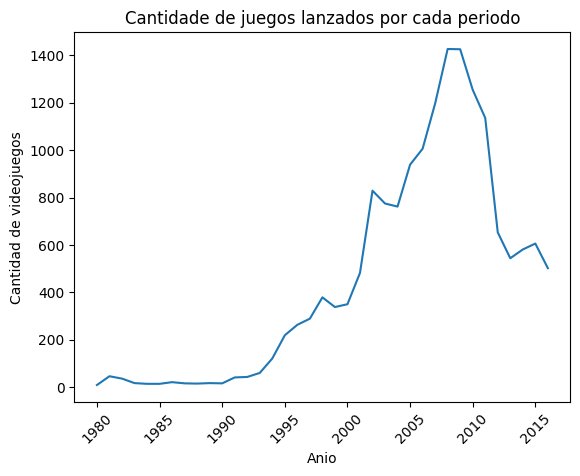

In [13]:
juegos_por_año.plot(x='year_of_release',
        y='Juegos_lanzados_por_año',
        legend=False,
        title='Cantidade de juegos lanzados por cada periodo',
        xlabel='Anio',
        ylabel='Cantidad de videojuegos',
        rot=45)

plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Exelente trabajo con el desarrollo de la gráfica, nos ayuda a entender el comportamiento del mercado de videojuegos en el tiempo



***Podemos observar que en el periodo de 1980 a 1992 se mantienen constante y en este punto empieza un orden acendente hasta llegar a su punto maximo en el año 2009 manteniendose en el 2010 despues de esto podemos observar una tendencia a la baja drasticamente hasta el periodo 2016***

3.3 Observa cómo varían las ventas de una plataforma a otra

In [14]:
#Elige las plataformas con las mayores y menores ventas totales
plat_mayores_ventas=juegos.groupby(['platform','year_of_release'])['ventas_total_regiones'].sum().reset_index()
plat_mayores_ventas
top5_mayores_ventas= plat_mayores_ventas.groupby('platform')['ventas_total_regiones'].sum().reset_index().sort_values('ventas_total_regiones',ascending=False).head(5)
print("plataformas con mayores ventas totales")
print(top5_mayores_ventas)
print()
print("plataformas con menores ventas totales")
top5_peores_ventas = plat_mayores_ventas.groupby('platform')['ventas_total_regiones'].sum().reset_index().sort_values('ventas_total_regiones',ascending=False).tail(5)
print(top5_peores_ventas)

plataformas con mayores ventas totales
   platform  ventas_total_regiones
16      PS2                1233.56
28     X360                 961.24
17      PS3                 931.34
26      Wii                 891.18
4        DS                 802.78

plataformas con menores ventas totales
   platform  ventas_total_regiones
25       WS                   1.42
24     TG16                   0.16
1       3DO                   0.10
9        GG                   0.04
14     PCFX                   0.03


***Podemos observar como PS2 es sin lugar a duda la mejor plataforma en la historia ya que supera ampliamente a sus perseguidores inmediatos mientras que la diferebcia con las platformas de menor ventas es abismal sin lugar a dudas son plataformas que marcaron el inicio de la era de los videojuegos pero talvez el echo de que la tecnologia no se encontraba globalizada no permitio un mayor impacto en las ventas***

3.4 Cual es la distribucion de ventas basada en los datos de cada año de las mejores plataformas?

In [15]:
num1=["PS2","X360","Wii","PS3","DS"]
juegos1=juegos[juegos['platform'].isin(num1)]

distribucion_por_año=juegos1.groupby(['year_of_release','platform'])['ventas_total_regiones'].sum().reset_index()
distribucion_por_año=pd.DataFrame(distribucion_por_año)
distribucion_por_año=distribucion_por_año.rename(columns={"year_of_release":"periodos_de_ventas"})

distribucion_pivot=distribucion_por_año.pivot_table(index="platform",columns= "periodos_de_ventas",values="ventas_total_regiones")
distribucion_pivot=distribucion_pivot.rename(columns={"year_of_release":"periodos de ventas"})
distribucion_pivot1=distribucion_pivot.fillna(0)
distribucion_pivot1


periodos_de_ventas,1985.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,,,,,,,,,,,,,,
DS,0.02,0.00,0.00,0.00,0.00,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00
PS2,0.00,39.17,166.43,205.38,184.31,211.81,160.66,103.42,75.99,53.90,26.40,5.64,0.45,0.00,0.00,0.00,0.00,0.00
PS3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
Wii,0.00,0.00,0.00,0.00,0.00,0.00,0.00,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18
X360,0.00,0.00,0.00,0.00,0.00,0.00,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52


***En este analisis podemos observar como existen plataformas como DS y PS2 que desaparecieron despues de un lapso de tiempo en el mercado  y como PS3, Wii y X360 aparecieron y se encuentran actualemnte en el mercado.***

***En la siguiente fase de nuestro analisis veremos cuando apareceiron las plataformas y cual es el promedio de vida de cada una y de todas en general.***

3.5.- Calcular el primer año de  lanzamiento y el ultimo por cada una de las plataformas

In [16]:
inicio_final_plataformas=juegos.groupby('platform')['year_of_release'].agg(['min','max']).reset_index()
inicio_final_plataformas=inicio_final_plataformas.rename(columns={'min':'primer_lanzamiento','max':"ultimo_lanzamiento"})
inicio_final_plataformas

,platform,primer_lanzamiento,ultimo_lanzamiento
0,2600,1980.0,1989.0
1,3DO,1994.0,1995.0
2,3DS,2011.0,2016.0
3,DC,1998.0,2008.0
4,DS,1985.0,2013.0
5,GB,1988.0,2001.0
6,GBA,2000.0,2007.0
7,GC,2001.0,2007.0
8,GEN,1990.0,1994.0
9,GG,1992.0,1992.0


3.6.-Calcula cuantos años se mantuvieron en el mercado cada una de las plataformas

In [17]:
inicio_final_plataformas['años_en_el_mercado']= (inicio_final_plataformas['ultimo_lanzamiento']-inicio_final_plataformas['primer_lanzamiento'])
inicio_final_plataformas

,platform,primer_lanzamiento,ultimo_lanzamiento,años_en_el_mercado
0,2600,1980.0,1989.0,9.0
1,3DO,1994.0,1995.0,1.0
2,3DS,2011.0,2016.0,5.0
3,DC,1998.0,2008.0,10.0
4,DS,1985.0,2013.0,28.0
5,GB,1988.0,2001.0,13.0
6,GBA,2000.0,2007.0,7.0
7,GC,2001.0,2007.0,6.0
8,GEN,1990.0,1994.0,4.0
9,GG,1992.0,1992.0,0.0


3.7.-Cual es el periodo minimo y el maximo que se han mantenido las plataformas en el mercado

In [18]:
print(f'La cantidad minima de años que se ha mantenido una plataforma en el mercado es de: '+str(inicio_final_plataformas['años_en_el_mercado'].min())+' años')
print(f'La cantidad maxima de años que se ha mantenido una plataforma en el mercado es de: '+str(inicio_final_plataformas['años_en_el_mercado'].max())+' años')

La cantidad minima de años que se ha mantenido una plataforma en el mercado es de: 0.0 años
La cantidad maxima de años que se ha mantenido una plataforma en el mercado es de: 31.0 años


3.8.-Cual es tiempo promedio en el mercado de las plataformas?

In [19]:
promedio_en_el_mercado=inicio_final_plataformas['años_en_el_mercado'].mean()
promedio=round(promedio_en_el_mercado)
print(f'El promedio en el mercado de las plataformas es de ' +str(promedio)+' años')

El promedio en el mercado de las plataformas es de 8 años


3.9.- Que plataformas que solian ser y son pupulares

In [20]:
#Conciderando plataformas populares a aquellas que se han mantenido al menos el tiempo promedio en el mercado
#calcular cuales son estas plataformas
populares=inicio_final_plataformas[inicio_final_plataformas['años_en_el_mercado']>=promedio].sort_values('primer_lanzamiento')
populares

,platform,primer_lanzamiento,ultimo_lanzamiento,años_en_el_mercado
0,2600,1980.0,1989.0,9.0
11,NES,1983.0,1994.0,11.0
4,DS,1985.0,2013.0,28.0
13,PC,1985.0,2016.0,31.0
5,GB,1988.0,2001.0,13.0
23,SNES,1990.0,1999.0,9.0
15,PS,1994.0,2003.0,9.0
3,DC,1998.0,2008.0,10.0
16,PS2,2000.0,2011.0,11.0
29,XB,2000.0,2008.0,8.0


3.10.- Cuales son las plataformas que solían ser populares pero que ahora no tienen ventas

In [21]:
#conciderando como el año actual el 2016 cuales son las plataformas populares que han salido del mercado
solian_ser_populares=populares[populares['ultimo_lanzamiento']<2016]
solian_ser_populares

,platform,primer_lanzamiento,ultimo_lanzamiento,años_en_el_mercado
0,2600,1980.0,1989.0,9.0
11,NES,1983.0,1994.0,11.0
4,DS,1985.0,2013.0,28.0
5,GB,1988.0,2001.0,13.0
23,SNES,1990.0,1999.0,9.0
15,PS,1994.0,2003.0,9.0
3,DC,1998.0,2008.0,10.0
16,PS2,2000.0,2011.0,11.0
29,XB,2000.0,2008.0,8.0
19,PSP,2004.0,2015.0,11.0


###4.-Construye  un modelo para el 2017.


4.1.-Determina para qué período debes tomar datos

In [22]:
#conciderando que el promedio de estadia en el mercado de las plataformas es de 8 años calcular el periodo para proyectar el 2017
periodo = 2016-promedio+1
print(f'El periodo para nuestra proyeccion de datos sera desde el año ' +str(periodo)+ ' hasta el 2016')

El periodo para nuestra proyeccion de datos sera desde el año 2009 hasta el 2016


4.2-Que plataformas se encuentran dentro del rango promedio en el mercado para poder pronosticar el año 2017?

In [23]:
#calcular todas las plataformas que hayan producido y que esten produciendo dentro del rango del 2009 hasta el 2016
plataformas_para_proyeccion=juegos.groupby(['platform'])['year_of_release'].agg(['min','max']).reset_index()
plataformas_para_proyeccion1=plataformas_para_proyeccion[plataformas_para_proyeccion['min']>=2009]
plataformas_para_proyeccion1

,platform,min,max
2,3DS,2011.0,2016.0
18,PS4,2013.0,2016.0
20,PSV,2011.0,2016.0
27,WiiU,2012.0,2016.0
30,XOne,2013.0,2016.0


4.3.-Filtrar los datos de las plataformas que permitan generar un modelo para el año 2017

In [24]:
num=["3DS","PS4","PSV","WiiU","XOne"]
juegos_a_predecir=juegos[juegos['platform'].isin(num)]
#Trabaja solo con los datos que consideras relevantes
lideres_en_venta1=juegos_a_predecir.groupby(["platform","year_of_release"])["ventas_total_regiones"].sum().reset_index().sort_values("ventas_total_regiones",ascending=False)
datos_relevantes=lideres_en_venta1.pivot(index='platform',columns='year_of_release', values='ventas_total_regiones').reset_index()
datos_relevantes=datos_relevantes.fillna(0)

datos_relevantes


year_of_release,platform,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
0,3DS,63.20,51.36,56.57,43.76,27.78,15.14
1,PS4,0.00,0.00,25.99,100.00,118.90,69.25
2,PSV,4.63,16.19,10.59,11.90,6.25,4.25
3,WiiU,0.00,17.56,21.65,22.03,16.35,4.60
4,XOne,0.00,0.00,18.96,54.07,60.14,26.15


4.4.- Cual es el orden de ventas de las plataformas encontradas

In [25]:
#plataformas lideres en ventas en el lapso del 2009 al 2016
lideres_en_ventas=juegos_a_predecir.groupby(["platform"])["ventas_total_regiones"].sum().reset_index().sort_values("ventas_total_regiones",ascending=False)
lideres_en_ventas


,platform,ventas_total_regiones
1,PS4,314.14
0,3DS,257.81
4,XOne,159.32
3,WiiU,82.19
2,PSV,53.81


***En base a los hallazgos anteriores podriamos decir que PS4 es la plataforma con mayor proyeccion de ventas ya que es una de las que menos tiempo lleva en el mercado y es la que mas ha vendido.***

***Por otro lado si bien 3DS se encuentra en segundo lugar seria un poco arriesgado ya que sabemos que el promedio en el mercado de una plataforma es de 8 años y ellos ya se encuentran 7, de todos modos no es una regla absoluta como hemos visto y se podria conciderar tambien una buena opcion.***

***Para finalizar nuestro pronostico se podria decir que PSV esta en su etapa final ya que esta en el limite de años y tambien con una tendencia a la baja en sus ventas.***

###5.-Crea un diagrama de caja para las ventas globales de todos los juegos, de las 5 plataformas encontradas

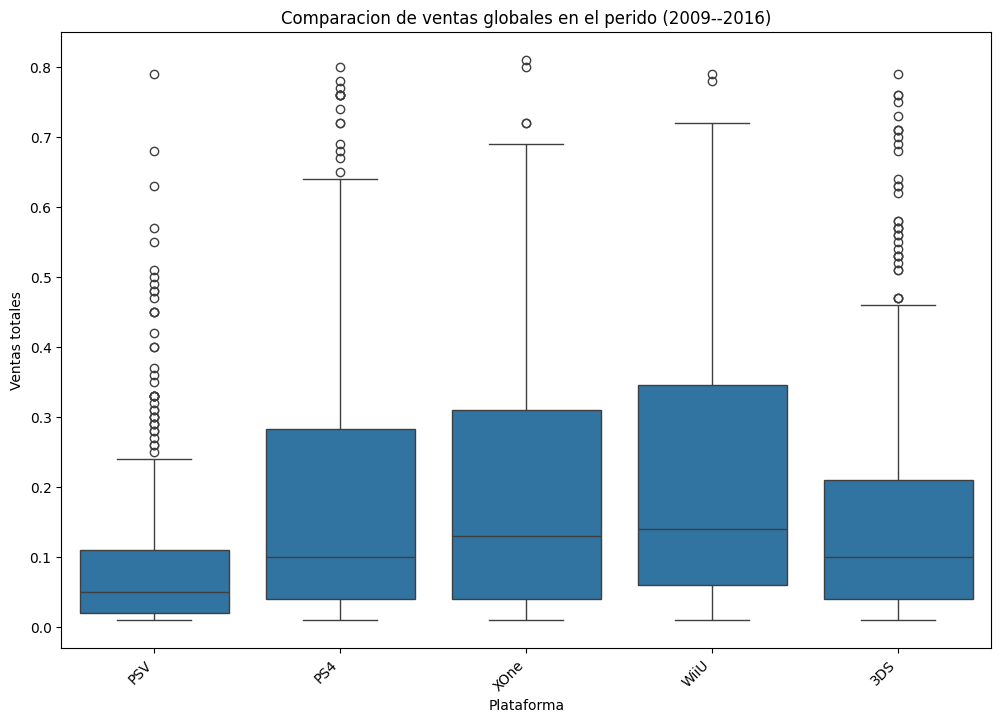

In [26]:
#calculamos el IQR
Q1= juegos_a_predecir['ventas_total_regiones'].quantile(0.25)
Q3= juegos_a_predecir['ventas_total_regiones'].quantile(0.75)
IQR= Q3-Q1
#definimos los limites
limite_inferior= Q1-1.5*IQR
limite_superior= Q3+1.5*IQR
#filtramos los valores atipico
valores_atipicos = juegos_a_predecir[(juegos_a_predecir['ventas_total_regiones']< limite_inferior) | (juegos_a_predecir['ventas_total_regiones']> limite_superior)]
#eliminamos los valores atipicos del dataframe para tener una mejor visualizacion
juegos_a_predecir_sin_atipicos= juegos_a_predecir[~((juegos_a_predecir['ventas_total_regiones']< limite_inferior) | (juegos_a_predecir['ventas_total_regiones']> limite_superior))]

plt.figure(figsize = (12,8))

sns.boxplot(x='platform', y='ventas_total_regiones', data = juegos_a_predecir_sin_atipicos)

plt.title('Comparacion de ventas globales en el perido (2009--2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.xticks(rotation=45, ha='right')
plt.show()

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

***Por medio de este diagrama de caja encontramos que si bien las medias de ventas son muy parecidas en casi todas las platafromas, la cantidad de ventas si varia en cuanto a cantidades y tambien nos permite visualizar y acentuar lo que habiamos comentado anteriormente***

***PS4 es la plataforma con las mejores ventas ya que si bien el grafico se ve un poco inferior a XOne sus valores atipicos de ventas son muy superiores a los demas, lo que lo convierte en la plataforma mas rentable de todas.***

****5.1 Escoje una plataforma de la lista anterior a tu eleccion.****

Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas.


Text(0.5, 1.0, 'Correlacion puntaje usuario y las ventas totales PS4')

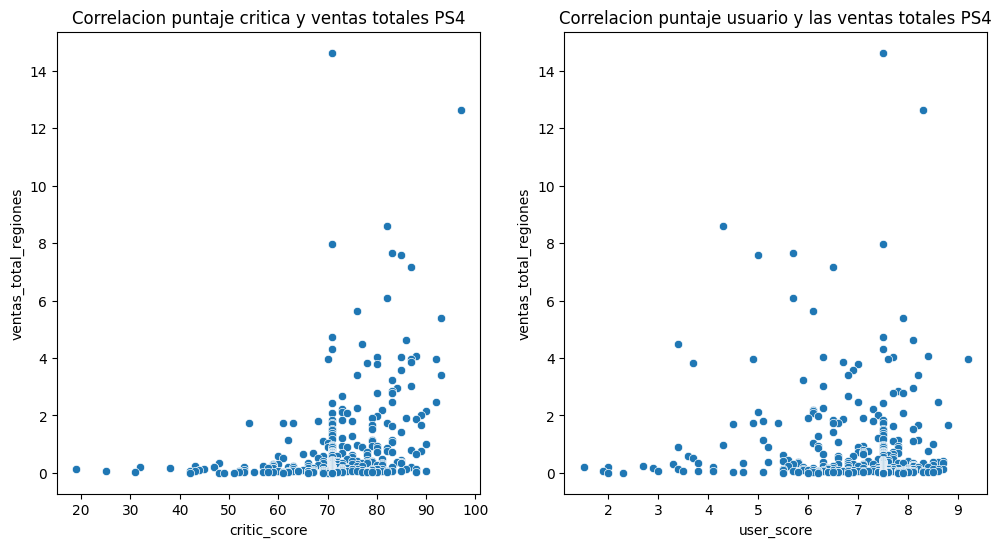

In [26]:
#Escogemos la plataforma PS4
PS4= juegos[juegos['platform']=='PS4']
#empezamos a generar nuestro grafico de dispercion
fig, axes = plt.subplots(1,2, figsize=(12,6))

sns.scatterplot( x='critic_score', y='ventas_total_regiones', data=PS4, ax=axes[0])
axes[0].set_title("Correlacion puntaje critica y ventas totales PS4")

sns.scatterplot( x='user_score', y='ventas_total_regiones', data=PS4, ax=axes[1])
axes[1].set_title("Correlacion puntaje usuario y las ventas totales PS4")


<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el análisis de la relación de score con las ventas

In [27]:
ps4_critica_ventas = PS4['critic_score'].corr(PS4['ventas_total_regiones'])
print(f'La correlacion entre la critica profesional y las ventas  de PS4 es '+str(ps4_critica_ventas))
print()
ps4_usuarios_ventas = PS4['user_score'].corr(PS4['ventas_total_regiones'])
print(f'La correlacion entre la critica de los usuarios y las ventas  de PS4 es '+str(ps4_usuarios_ventas))

La correlacion entre la critica profesional y las ventas  de PS4 es 0.3387064530024634

La correlacion entre la critica de los usuarios y las ventas  de PS4 es -0.06275557891282788


***Dentro de los hallazgos al analizar las correlaciones de nuestra plataforma seleccionada, observamos que la critica profesional tiene una correlacion moderada frente a las ventas lo que indica que talvez los usuarios se fijan mucho a la hora de comprar sus juegos en la misma***

***Por otro lado la correlacion de la puntuacion de los usuarios frente a las ventas de nuestra plataforma es nula, las ventas de PS4 no dependen de la misma.***

5.3.- Compara las ventas de los juegos de la pataforma escojida frente a los  mismos juegos en otras 4 plataformas

In [28]:
juegos_de_ps2=pd.unique(PS4['name'])
juegos_de_ps2=juegos_de_ps2.tolist()

juegos_de_ps2

comparacion=juegos_a_predecir[juegos_a_predecir['name'].isin(PS4['name'])]
comparacion1=comparacion.groupby(['name','platform'])['ventas_total_regiones'].sum().reset_index()
comparacion1[comparacion1.duplicated(subset='name',keep=False)].head(50)


,name,platform,ventas_total_regiones
0,7 Days to Die,PS4,0.14
1,7 Days to Die,XOne,0.05
2,Adventure Time: Finn & Jake Investigations,3DS,0.09
3,Adventure Time: Finn & Jake Investigations,PS4,0.10
4,Adventure Time: Finn & Jake Investigations,WiiU,0.05
5,Adventure Time: Finn & Jake Investigations,XOne,0.05
6,Aegis of Earth: Protonovus Assault,PS4,0.02
7,Aegis of Earth: Protonovus Assault,PSV,0.03
8,Agatha Christie's The ABC Murders,PS4,0.02
9,Agatha Christie's The ABC Murders,XOne,0.01


***En esta compracion tambien podemos acentuar el porque PS4 es la plataforma actual lider en venta ya que al analizar juego por juego siempre obtiene mayores ganancias frente a su competencia aunque en algunos casos llegue a ser minima, siempre esta al frente.***

###6.-Echa un vistazo a la distribución general de los juegos por género de las plataformas lideres actuales

6.1.- Encuentra la catidad de juegos lanzados al mercado por genero

In [30]:
juegos_por_genero=juegos_a_predecir.groupby('genre')['platform'].count().reset_index()
juegos_por_genero=juegos_por_genero.rename(columns={'platform':'cantidad_de_juegos_por_genero'})
juegos_por_genero=juegos_por_genero.sort_values('cantidad_de_juegos_por_genero',ascending=False)
juegos_por_genero

,genre,cantidad_de_juegos_por_genero
0,Action,629
7,Role-Playing,244
1,Adventure,175
10,Sports,140
3,Misc,139
8,Shooter,100
4,Platform,71
6,Racing,63
2,Fighting,60
9,Simulation,44


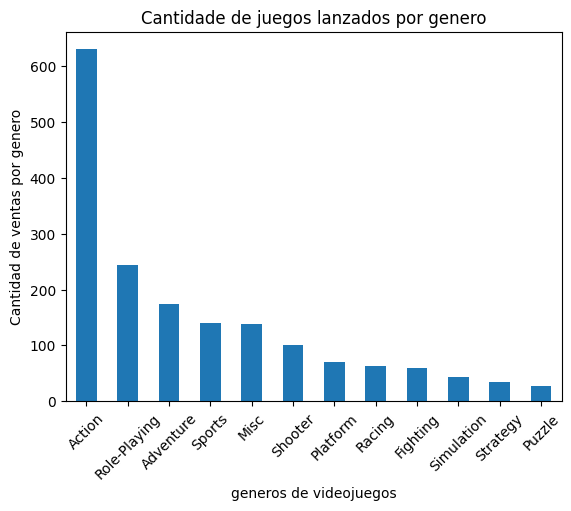

In [31]:
juegos_por_genero.plot(x='genre',kind='bar',
        y='cantidad_de_juegos_por_genero',
        legend=False,
        title='Cantidade de juegos lanzados por genero',
        xlabel='generos de videojuegos',
        ylabel='Cantidad de ventas por genero',
        rot=45)

plt.show()

6.2.- Encuentra los generos mas rentables de las mejores plataformas actuales

In [32]:
ingresos_por_genero=juegos_a_predecir.groupby('genre')['ventas_total_regiones'].sum().reset_index()
ingresos_por_genero=ingresos_por_genero.rename(columns={'ventas_total_regiones':'cantidad_de_ingresos_por_genero'})
ingresos_por_genero=ingresos_por_genero.sort_values('cantidad_de_ingresos_por_genero',ascending=False)
ingresos_por_genero

,genre,cantidad_de_ingresos_por_genero
0,Action,227.34
8,Shooter,160.00
7,Role-Playing,138.78
10,Sports,95.85
4,Platform,65.24
6,Racing,47.18
3,Misc,43.50
2,Fighting,30.55
9,Simulation,29.16
1,Adventure,17.86


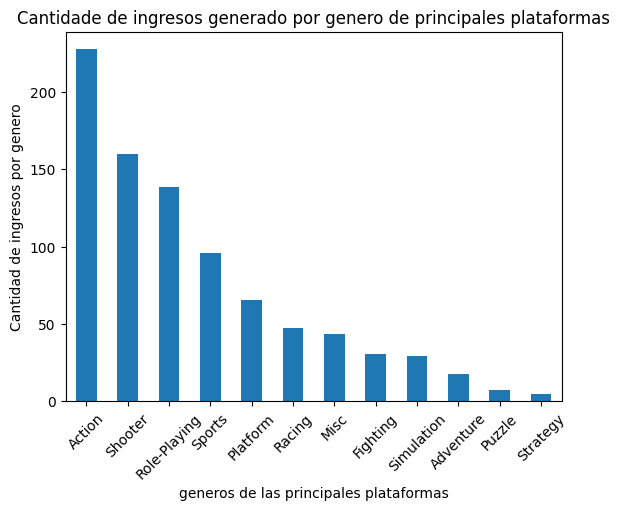

In [33]:
ingresos_por_genero.plot(x='genre',kind='bar',
        y='cantidad_de_ingresos_por_genero',
        legend=False,
        title='Cantidade de ingresos generado por genero de principales plataformas',
        xlabel='generos de las principales plataformas',
        ylabel='Cantidad de ingresos por genero',
        rot=45)

plt.show()

***Luego de realizar este analisis podemos decir que que los ingresos por genero no estan relacionados con las ventas por genero ya que como podemos observar en ambos graficos y cuadros estadisticos la unica variable en comun que se repite en primer lugar es Action que es el genero que mas se vende y el que mas ingresos genera, los demas se encuentran en diferentes posiciones en ambos cuadros lo que nos indica que talvez los juegos mas famosos son mas caros y menos vendidos en cantidad pero que generan mas ingresos por su fama y calidad.***

###7.-Para cada región (NA, UE, JP) determina lo siguiente:

7.1.-Encuentra las cinco plataformas principales.

7.2.-Encuentra las variaciones en sus cuotas de mercado.

7.3.-Encuentra los cinco géneros principales.

7.4.-Encuentra el efecto de las  clasificaciones de ESRB sobre las ventas en las diferentes regiones.

###Norte America

In [34]:
print('5 principales plaataformas de na y su cuota de mercado')
print()
top5_na_sales=juegos.groupby('platform')['na_sales'].sum().reset_index()
top5_na_sales=top5_na_sales.sort_values('na_sales',ascending=False).head(5)
top5_na_sales['cuota_mercado_na']= (top5_na_sales['na_sales']/top5_na_sales['na_sales'].sum())*100
print(top5_na_sales)
print()
print('5 principales generos de na')
print()
top5_generos_na=juegos.groupby('genre')['na_sales'].sum().reset_index()
top5_generos_na=top5_generos_na.sort_values('na_sales',ascending=False).head(5)
print(top5_generos_na)
print()
print('top 5 de calificaciones del rating de na')
print()
top5_rating_na=juegos.groupby('rating')['na_sales'].sum().reset_index()
top5_rating_na=top5_rating_na.sort_values('na_sales',ascending=False).head(5)
print(top5_rating_na)



5 principales plaataformas de na y su cuota de mercado

   platform  na_sales  cuota_mercado_na
28     X360    595.74         24.556775
16      PS2    572.92         23.616121
26      Wii    486.87         20.069086
17      PS3    390.13         16.081402
4        DS    380.31         15.676616

5 principales generos de na

       genre  na_sales
0     Action    863.17
10    Sports    671.20
8    Shooter    584.83
4   Platform    444.44
3       Misc    399.57

top 5 de calificaciones del rating de na

             rating  na_sales
1                 E   1274.24
8  sin calificacion   1225.84
7                 T    747.60
5                 M    742.89
2              E10+    345.50


###Europa

In [35]:
print('5 principales plaataformas de eu y su cuota de mercado')
print()
top5_eu_sales=juegos.groupby('platform')['eu_sales'].sum().reset_index()
top5_eu_sales=top5_eu_sales.sort_values('eu_sales',ascending=False).head(5)
top5_eu_sales['cuota_mercado_eu']= (top5_eu_sales['eu_sales']/top5_eu_sales['eu_sales'].sum())*100
print(top5_eu_sales)
print()
print('5 principales generos de eu')
print()
top5_generos_eu=juegos.groupby('genre')['eu_sales'].sum().reset_index()
top5_generos_eu=top5_generos_eu.sort_values('eu_sales',ascending=False).head(5)
print(top5_generos_eu)
print()
print('top 5 de calificaciones del rating de eu')
print()
top5_rating_eu=juegos.groupby('rating')['eu_sales'].sum().reset_index()
top5_rating_eu=top5_rating_eu.sort_values('eu_sales',ascending=False).head(5)
print(top5_rating_eu)


5 principales plaataformas de eu y su cuota de mercado

   platform  eu_sales  cuota_mercado_eu
16      PS2    332.63         23.778478
17      PS3    327.21         23.391023
28     X360    268.32         19.181196
26      Wii    258.32         18.466334
15       PS    212.39         15.182969

5 principales generos de eu

      genre  eu_sales
0    Action    510.99
10   Sports    371.33
8   Shooter    314.52
6    Racing    234.49
3      Misc    210.60

top 5 de calificaciones del rating de eu

             rating  eu_sales
1                 E    703.87
8  sin calificacion    609.65
5                 M    480.00
7                 T    421.79
2              E10+    183.35


###Japon

In [36]:
print('5 principales plaataformas de jp y su cuota de mercado')
print()
top5_jp_sales=juegos.groupby('platform')['jp_sales'].sum().reset_index()
top5_jp_sales=top5_jp_sales.sort_values('jp_sales',ascending=False).head(5)
top5_jp_sales['cuota_mercado_jp']= (top5_jp_sales['jp_sales']/top5_jp_sales['jp_sales'].sum())*100
print(top5_jp_sales)
print()
print('5 principales generos de jp')
print()
top5_generos_jp=juegos.groupby('genre')['jp_sales'].sum().reset_index()
top5_generos_jp=top5_generos_jp.sort_values('jp_sales',ascending=False).head(5)
print(top5_generos_jp)
print()
print('top 5 de calificaciones del rating de jp')
print()
top5_rating_jp=juegos.groupby('rating')['jp_sales'].sum().reset_index()
top5_rating_jp=top5_rating_jp.sort_values('jp_sales',ascending=False).head(5)
print(top5_rating_jp)

5 principales plaataformas de jp y su cuota de mercado

   platform  jp_sales  cuota_mercado_jp
4        DS    175.02         26.141506
15       PS    139.78         20.877956
16      PS2    137.54         20.543382
23     SNES    116.55         17.408254
2       3DS    100.62         15.028902

5 principales generos de jp

           genre  jp_sales
7   Role-Playing    353.39
0         Action    160.14
10        Sports    134.93
4       Platform    130.71
3           Misc    107.02

top 5 de calificaciones del rating de jp

             rating  jp_sales
8  sin calificacion    836.74
1                 E    197.96
7                 T    150.70
5                 M     63.58
2              E10+     40.20


****Analisis de la etapa 7****

***5 principales generos***

Observamos que si bien no en el mismo orden su preferencias son muy similares mas aun entre NA y EU mientras que JP se diferencia un poco mas con la aparicion de plataformas como SNES y 3DS que no se encuentran en niguna de las otras dos.

***Analisis de cuotas del mercado***

Para hacer este analisis hemos escojido nuevamente de manera personal la plataforma PS2 ya que observamos que se encuentra entre las mejores 5 en las tres regiones.

Encontramos que no existe una diferencia signifcativa para esta plataforma ya que tanto para NA como para EU esta es de 23 y para JP es ligeramente inferior con una cuota de 20.

Tambien nos llamo la atencion y decidimos analizar la plataforma DS que como dato curioso se encuentra en la quinta posicion en NA y en la primera posicion en JP.

Al analizar esta plataforma si encontramos como una diferencia significativa de 11 puntos entre NA y JP

Estos dos analisis de datos nos indican que podemos encontrar plataformas de gran preferencia global y plataformas de gran preferencia regional.

***Como afecta el rating en el porcentaje de ventas de cada una de las regiones?***

Aqui encontramos un patron comun en las tres regiones y es que T y sin calificaciones siempre estan en los dos primeros lugares, probablemente existen muchas que aun no estan calificadas y que una de las calificaciones que mas vende es T.


#8. Prueba las siguientes hipótesis:

8.1.-Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

#Eliminamos los valores atipicos de todas nuestras plataformas para evitar resultados sesgados al final

In [41]:
#calculamos el IQR
Quantil1= juegos['ventas_total_regiones'].quantile(0.25)
Quantil3= juegos['ventas_total_regiones'].quantile(0.75)
IQR1= Quantil3-Quantil1
#definimos los limites
limite_inferior1= Quantil1-1.5*IQR1
limite_superior1= Quantil3+1.5*IQR1
#filtramos los valores atipico
valores_atipicos1 = juegos[(juegos['ventas_total_regiones']< limite_inferior1) | (juegos['ventas_total_regiones']> limite_superior1)]
#eliminamos los valores atipicos del dataframe para tener una mejor visualizacion
juegos_sin_atipicos= juegos[~((juegos['ventas_total_regiones']< limite_inferior1) | (juegos['ventas_total_regiones']> limite_superior1))]

In [42]:
# Prueba las hipótesis
# hipotesis nula(h0)= Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
# hipotesis alternativa(h1)= Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son estadisticamente iguales

calificaciones_promedio_XboxOne = juegos_sin_atipicos[juegos_sin_atipicos['platform'].str.contains('XOne')]['user_score']
calificaciones_promedio_XboxOne=calificaciones_promedio_XboxOne.fillna(calificaciones_promedio_XboxOne.mean())
calificaciones_promedio_XboxOne
calificaciones_promedio_pc = juegos_sin_atipicos[juegos_sin_atipicos['platform'].str.contains('PC')]['user_score']
calificaciones_promedio_pc=calificaciones_promedio_pc.fillna(calificaciones_promedio_pc.mean())
calificaciones_promedio_pc

alpha = 0.05 #establecemos un nivel crítico de significación estadística
#realizamos la prueba de levene para identificar si verdaderamente las varianzas son nulas
resultados = levene(calificaciones_promedio_XboxOne, calificaciones_promedio_pc)#pruebamos la hipótesis de que las varianzas de las dos poblaciones independientes son iguales
print('valor p:', resultados.pvalue) #imprimimos el valor p obtenido

if resultados.pvalue < alpha:#comparamos los valores p obtenidos con el nivel de significación estadística
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.5863951095773552
No podemos rechazar la hipótesis nula


In [43]:
resultados = st.ttest_ind(calificaciones_promedio_XboxOne, calificaciones_promedio_pc, equal_var=True)#pruebamos la hipótesis de que las medias de las dos poblaciones independientes son iguales
print('valor p:', resultados.pvalue) #imprimimos el valor p obtenido

if resultados.pvalue < alpha:#comparamos los valores p obtenidos con el nivel de significación estadística
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.002258104600720455
Rechazamos la hipótesis nula


8.2.-Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [44]:
# Prueba las hipótesis
# hipotesis nula(h0)= Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son estadisticamente iguales
# hipotesis alternativa(h1)= Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

calificaciones_promedio_accion = juegos_sin_atipicos[juegos_sin_atipicos['genre'].str.contains('Action')]['user_score']
calificaciones_promedio_accion=calificaciones_promedio_accion.fillna(calificaciones_promedio_accion.mean())
calificaciones_promedio_accion

calificaciones_promedio_deportes = juegos_sin_atipicos[juegos_sin_atipicos['genre'].str.contains('Sports')]['user_score']
calificaciones_promedio_deportes=calificaciones_promedio_deportes.fillna(calificaciones_promedio_deportes.mean())
calificaciones_promedio_deportes

alpha = 0.05 #establecemos un nivel crítico de significación estadística
#realizamos la prueba de levene para identificar si verdaderamente las varianzas son diferentes y si usamos el
resultados1 = levene(calificaciones_promedio_accion, calificaciones_promedio_deportes)#pruebamos la hipótesis de que las varianzas de las dos poblaciones independientes son iguales
print('valor p:', resultados1.pvalue) #imprimimos el valor p obtenido

if resultados1.pvalue < alpha:#comparamos los valores p obtenidos con el nivel de significación estadística
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.298841845998876
No podemos rechazar la hipótesis nula


In [46]:
resultados2 = st.ttest_ind(calificaciones_promedio_accion, calificaciones_promedio_deportes, equal_var=True)#pruebamos la hipótesis de que las medias de las dos poblaciones independientes son iguales

print('valor p:', resultados2.pvalue) #imprimimos el valor p obtenido

if resultados2.pvalue < alpha:#comparamos los valores p obtenidos con el nivel de significación estadística
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.4073818519616378
No podemos rechazar la hipótesis nula


<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con la prueba de hipótesis. Además, lo complementaste con la prueba de levene para mostrar el supuesto de varianzas iguales. 

#Concluciones generales

El proyecto de la tienda de videojuegos online Ice es un proyecto que nos ha permitido conocer de manera estadista parte de la historia de los videojuegos en algunas regiones del mundo y en donde después de analizar los datos recibidos por la tienda pudimos sacar algunas conclusiones a destacar.

-Los inicios de era de los videojuegos se datan a los años 80’s llegando a tener su mayor auge en el año 2009 y 2010 donde despues empieza una caída hasta el 2016

-Durante el periodo mencionado anteriormente la plataforma que más destacó a nivel global es PS2

-Las plataformas en general tienen un tiempo de vida en el mercado de 8 años, lógicamente con excepciones en donde existen plataformas fuera de este rango, manteniéndose en el mercado desde menos de un año hasta llegar a 31 años como es el caso de PC.

-Las plataformas que actualmente (2016) se encuentran en el mercado y que en base a nuestro análisis tienen posibilidades de seguir trabajando son: 3DS, PS4,PSV,Wii,XOne.

-La plataforma que actualmente(2016) es la lider en ventas es PS4, y es la que se podría pronosticar un futuro prometedor ya que solamente lleva 4 años en el mercado.

-La media de ventas de las 5 mejores plataformas actuales es muy similar pero existen plataformas como PS4 con una cantidad de valores atípicos positivos muy amplia lo que la distingue de las demás a hora de comparar sus ventas.

-Tomamos a la plataforma PS4 para hacer algunos análisis individuales y ver su comportamiento.

-Existe una correlación medianamente positiva en cuanto a la crítica de los profesionales y las ventas de esta plataforma y no existe una correlación entre la crítica de los usuarios y las ventas de PS4

-Comparando las ventas de los juegos de la plataforma PS4 con los mismos juegos de las otras 4 plataformas actuales encontramos que existe una superioridad al momento de generar ingresos, es decir la gente prefiere esta consola al momento de jugar los géneros que están dentro de esta plataforma.

-Al analizar los juegos lanzados por género de las 5 plataformas actuales encontramos que no existe una relación directa entre la cantidad de géneros que se compran respecto a la cantidad de ingresos que generan, es decir hay juegos que se venden mucho más pero generan ingresos menores a juegos que se venden menos, con la excepción de los juegos de acción que son una constante como líderes en las listas tanto de la cantidad de ventas como la cantidad de ingresos que generan

-Luego analizamos las tres regiones que nos brindaron en nuestros datos que son NA, EU y JP, en donde pudimos observar que existen diferencias en algunos casos no muy marcadas como en la preferencia de consolas entre EU y NA y otras muy marcadas como las cuotas de mercado donde ciertas plataformas varían mucho de una región a otra, observamos que existen más paridad entre NA y EU y más diferencias de estas dos plataformas respecto a JP esto puede deberse a la diferencia cultural y como todos sabemos es mucho más marcada respecto a otras regiones del lado occidental.

-Observamos también que el rating en las tres regiones en su mayoría de ventas está calificado con las variables E, T,M,E10+ y sin calificación, por lo que entendemos que hay muchos juegos que todavia no estan valorados de esta manera pero que esto no altera el nivel de ventas en ninguna de las tres regiones.

-Para finalizar generamos dos hipótesis para analizar su comportamiento en donde descubrimos que las calificaciones promedio de los usuarios respecto a  las plataformas Xbox One y PC son diferentes, mientrasque respecto a los géneros de acción y deporte son las mismas y no existen diferencias significativas.

-En general el proyecto nos ha permitido conocer el comportamiento histórico de los videojuegos y tener un conocimiento más profundo de los sucesos en diferentes regiones del mundo y así poder tener una idea y un panorama respecto a lo que podría suceder los próximos años.


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Marcelo, en general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:


*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
    
</div>